To process output vehicle stock database of TEAM-Kenya, including:
1. number of second-hand import (SHI) techologies vs. new technologies per year

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [32]:
technology = pd.read_csv('./data/technology.csv')
technology

,TechID,ModeID,VehTypeID,MassCatID,FuelID,EngineID,TransTypeID,Availability,Final_Year,HybridFlag,spec_energ_consump,spec_energ_electric,noise_class,PurchasePrice,ExpectedLifeFactor,Capacity,AveEconLife,SecondHandImportFlag
0,10,1,2,4,1,10,1,1980,2000.0,0,6.57,NaN,0,5000.0,1,2.0,10,0
1,20,1,2,4,12,10,1,1995,2010.0,0,9.51,NaN,2,7000.0,1,2.0,10,0
2,25,1,2,4,12,11,1,2010,2020.0,0,8.37,NaN,2,6000.0,1,2.0,10,0
3,26,1,2,4,12,12,1,2020,NaN,0,7.18,NaN,2,5500.0,1,2.0,10,0
4,30,1,2,4,1,11,1,2000,2010.0,0,5.65,NaN,0,5000.0,1,2.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,10704,1,3,2,12,17,1,2033,2037.0,0,17.62,1.0,2,7000.0,1,5.0,12,1
1525,10705,1,3,2,12,18,1,2038,2042.0,0,16.33,1.0,2,6000.0,1,5.0,12,1
1526,10706,1,3,2,12,19,1,2043,2047.0,0,15.14,1.0,2,6000.0,1,5.0,12,1
1527,10707,1,3,2,12,20,1,2048,NaN,0,14.04,1.0,2,6000.0,1,5.0,12,1


In [2]:
# define import table
vehstock = pd.read_csv('stock_data_numveh.csv')
vehstock

,ScenarioID,CountryID,TechID,Year,Age,TransTypeID,VehTypeID,MassCatID,EngineID,FuelID,NumVeh
0,1,9,70,2012,17,1,3,1,1,1,36047.21
1,1,9,70,2012,18,1,3,1,1,1,14382.69
2,1,9,70,2012,19,1,3,1,1,1,4565.78
3,1,9,70,2012,20,1,3,1,1,1,1060.07
4,1,9,70,2012,21,1,3,1,1,1,196.12
...,...,...,...,...,...,...,...,...,...,...,...
55628,1,9,10707,2049,0,1,3,2,20,12,230815.70
55629,1,9,10707,2049,1,1,3,2,20,12,243403.20
55630,1,9,10707,2050,0,1,3,2,20,12,229415.80
55631,1,9,10707,2050,1,1,3,2,20,12,230652.50


In [3]:
# mask for cars and SHI
years = range(2012, 2051)

stock_data = {'new_petrol':[], 'SHI_petrol':[], 'new_bev':[], 'SHI_bev':[]}
for year in years:

    annual_Data = vehstock[vehstock['Year'] == year]

    stock_data['new_petrol'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['FuelID'] == 1)]['NumVeh'].sum())
    stock_data['SHI_petrol'].append(annual_Data[(annual_Data['TechID'] >= 9000) & (annual_Data['FuelID'] == 1)]['NumVeh'].sum())
    stock_data['new_bev'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['FuelID'] == 12)]['NumVeh'].sum())
    stock_data['SHI_bev'].append(annual_Data[(annual_Data['TechID'] >= 9000) & (annual_Data['FuelID'] == 12)]['NumVeh'].sum())

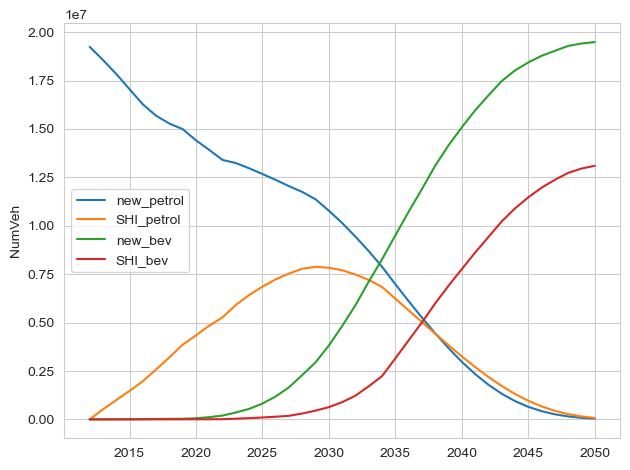

In [4]:
%matplotlib inline

fig,ax = plt.subplots()

clr_cnt = 0
for data in stock_data:

    ax.plot(years, stock_data[data], label=data, color=sns.color_palette()[clr_cnt])

    clr_cnt += 1

ax.set_ylabel('NumVeh')
plt.legend()

fig.tight_layout()
fig.savefig('tester.png')


In [12]:
# interface data - has total/new/scrapped
interface_vsm = pd.read_csv('interface_vsm_numveh.csv')
interface_vsm

,TDVSID,ScenarioID,CountryID,Year,TechID,VehCatID,NumVeh
0,0,1,9,2012,10,S,441.18
1,0,1,9,2012,10,T,11580.50
2,0,1,9,2012,20,S,0.00
3,0,1,9,2012,20,T,0.01
4,0,1,9,2012,25,N,405.57
...,...,...,...,...,...,...,...
52302,0,1,9,2050,10706,S,27879.22
52303,0,1,9,2050,10706,T,2456454.72
52304,0,1,9,2050,10707,N,482965.16
52305,0,1,9,2050,10707,S,1107.03


In [34]:
#  mask for cars and SHI
years = range(2012, 2051)

interface_stock_data = {'new_new':[], 'new_SHI':[], 'stock_new':[], 'stock_SHI':[]}
for year in years:

    # just cars
    annual_Data = interface_vsm[(interface_vsm['Year'] == year) & (interface_vsm['TechID'].isin(technology[technology['VehTypeID'] == 3]['TechID']))]

    # interface_stock_data['new_petrol'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['FuelID'] == 1)]['NumVeh'].sum())
    # interface_stock_data['SHI_petrol'].append(annual_Data[(annual_Data['TechID'] >= 9000) & (annual_Data['FuelID'] == 1)]['NumVeh'].sum())
    # interface_stock_data['new_bev'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['FuelID'] == 12)]['NumVeh'].sum())
    # interface_stock_data['SHI_bev'].append(annual_Data[(annual_Data['TechID'] >= 9000) & (annual_Data['FuelID'] == 12)]['NumVeh'].sum())

    interface_stock_data['new_new'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['VehCatID'] == 'N')]['NumVeh'].sum())
    interface_stock_data['new_SHI'].append(annual_Data[(annual_Data['TechID'] >= 9000) & (annual_Data['VehCatID'] == 'N')]['NumVeh'].sum())
    interface_stock_data['stock_new'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['VehCatID'] == 'T')]['NumVeh'].sum())
    interface_stock_data['stock_SHI'].append(annual_Data[(annual_Data['TechID'] >= 9000)  & (annual_Data['VehCatID'] == 'T')]['NumVeh'].sum())



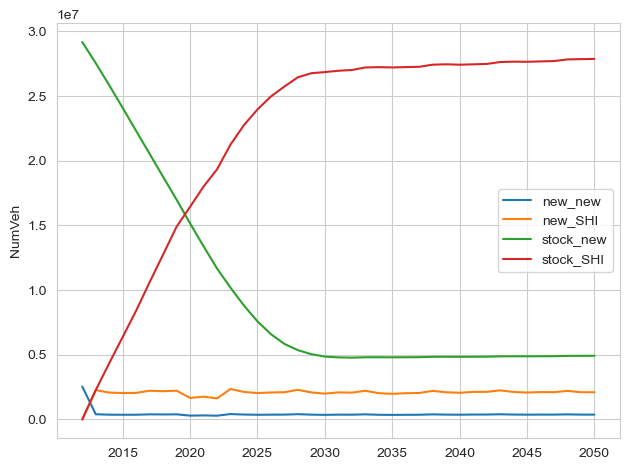

In [35]:
%matplotlib inline


fig,ax = plt.subplots()

clr_cnt = 0
for data in interface_stock_data:

    ax.plot(years, interface_stock_data[data], label=data, color=sns.color_palette()[clr_cnt])

    clr_cnt += 1

ax.set_ylabel('NumVeh')
plt.legend()

fig.tight_layout()
fig.savefig('tester_interfacevsm.png')


In [20]:
import PyQt5
